In [2]:
import pandas as pd
import numpy as np
import random

# Dataset

In [9]:
df = pd.read_csv('train_data_null_removed.csv')
df_test = pd.read_csv('test_data_null_removed.csv')
df.head(3)

,Unnamed: 0,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,...,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan
0,0,6875768,4G,Smartphone,0.0,Kegalle,40-50,0.694534,0.400863,0.035809,...,0.320274,0.0,0.9,0.232406,0.382201,0.0,0.333333,0.026661,0.038659,2
1,1,6406277,4G,Smartphone,0.0,Galle,40-50,0.106109,0.457370,0.160790,...,0.074237,0.0,0.5,0.046956,0.074547,0.0,0.000000,0.030848,0.043478,1
2,2,3563570,4G,Smartphone,0.0,Kandy,30-40,0.588424,0.427261,0.105328,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,6


In [10]:
df.dtypes

Unnamed: 0                       int64
primary_identifier               int64
device_type                     object
device_category                 object
gender                         float64
district_name                   object
age_group                       object
network_stay                   float64
average_monthly_bill_amount    float64
dusage_sum                     float64
dusage_min                     float64
dusage_max                     float64
dusage_avg                     float64
dusage_days                    float64
dusage_stddev                  float64
vusage_onnet_sum               float64
vusage_onnet_max               float64
vusage_onnet_min               float64
vusage_onnet_days              float64
vusage_onnet_avg               float64
vusage_onnet_stddev            float64
vusage_offnet_sum              float64
vusage_offnet_max              float64
vusage_offnet_min              float64
vusage_offnet_days             float64
vusage_offnet_avg        

In [11]:
df.shape

(10500, 32)

In [12]:
df.describe()

,Unnamed: 0,primary_identifier,gender,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,...,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan
count,10500.000000,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,...,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,5249.500000,5.531286e+06,0.279619,0.286123,0.444282,0.072632,0.020769,0.047215,0.061247,0.826384,...,0.030799,0.000961,0.299022,0.041576,0.038414,0.017619,0.082254,0.026661,0.038659,3.059238
std,3031.233247,2.597973e+06,0.448833,0.231154,0.048287,0.089980,0.048256,0.060512,0.073952,0.322567,...,0.046175,0.014120,0.315156,0.064203,0.057529,0.078862,0.166949,0.025517,0.042409,2.057261
min,0.000000,1.000454e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2624.750000,3.286428e+06,0.000000,0.061093,0.409881,0.010991,0.000000,0.012028,0.010946,0.833333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015424,0.000000,1.000000
50%,5249.500000,5.538684e+06,0.000000,0.254019,0.434428,0.044218,0.000681,0.032030,0.038952,1.000000,...,0.014369,0.000000,0.200000,0.023565,0.017749,0.000000,0.000000,0.026661,0.038659,3.000000
75%,7874.250000,7.799776e+06,1.000000,0.469453,0.464531,0.101105,0.018281,0.060310,0.084820,1.000000,...,0.044181,0.000000,0.533333,0.054687,0.055161,0.000000,0.000000,0.026661,0.043478,5.000000
max,10499.000000,9.999195e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [13]:
for column in df.columns:
    print(column + ':', df[column].unique())

Unnamed: 0: [    0     1     2 ... 10497 10498 10499]
primary_identifier: [6875768 6406277 3563570 ... 1433957 8494507 3569439]
device_type: ['4G' '2G' '3G']
device_category: ['Smartphone' 'Basic' 'Feature phone' 'Pluggable card' 'Tablet' 'Modem']
gender: [0. 1.]
district_name: ['Kegalle' 'Galle' 'Kandy' 'Colombo' 'Gampaha' 'Kalutara' 'Kurunegala'
 'Puttalam' 'Jaffna' 'Ampara' 'Matara' 'Matale' 'Anuradhapura' 'Ratnapura'
 'Nuwara Eliya' 'Badulla' 'Unknown' 'Mannar' 'Monaragala' 'Trincomalee'
 'Batticaloa' 'Hambantota' 'Polonnaruwa' 'Vavuniya' 'Kilinochchi'
 'Mullaitivu']
age_group: ['40-50' '30-40' '50-60' '20-30' '>70' '60-70' '<20']
network_stay: [0.69453376 0.10610932 0.58842444 0.06752412 0.10932476 0.08681672
 0.10289389 0.53697749 0.14469453 0.25080386 0.19614148 0.09324759
 0.07395498 0.56270096 0.04823151 0.2926045  0.15755627 0.00321543
 0.17363344 0.39549839 0.28617363 0.65594855 0.41157556 0.37942122
 0.71061093 0.49517685 0.51768489 0.74276527 0.1318328  0.40514469
 0.27974

In [14]:
df['gender'].isnull().sum()

0

In [15]:
df['gender'].value_counts()

0.0    7564
1.0    2936
Name: gender, dtype: int64

In [16]:
df['next_month_plan'].value_counts() / 105

1    34.980952
3    16.352381
5    14.838095
2    12.895238
6     7.047619
4     7.000000
7     3.466667
8     3.419048
Name: next_month_plan, dtype: float64

# NULL values

In [17]:
df.isnull().sum()

Unnamed: 0                     0
primary_identifier             0
device_type                    0
device_category                0
gender                         0
district_name                  0
age_group                      0
network_stay                   0
average_monthly_bill_amount    0
dusage_sum                     0
dusage_min                     0
dusage_max                     0
dusage_avg                     0
dusage_days                    0
dusage_stddev                  0
vusage_onnet_sum               0
vusage_onnet_max               0
vusage_onnet_min               0
vusage_onnet_days              0
vusage_onnet_avg               0
vusage_onnet_stddev            0
vusage_offnet_sum              0
vusage_offnet_max              0
vusage_offnet_min              0
vusage_offnet_days             0
vusage_offnet_avg              0
vusage_offnet_stddev           0
number_of_fixed_bb_accounts    0
number_of_iptv_accounts        0
add_on_tot_rental              0
add_on_cou

In [42]:
# df[['device_type', 'device_category', 'gender', 'age_group']] = df[['device_type', 'device_category', 'gender', 'age_group']].fillna(df[['device_type', 'device_category', 'gender', 'age_group']].mode().iloc[0])

In [18]:
df.isnull().sum()

Unnamed: 0                     0
primary_identifier             0
device_type                    0
device_category                0
gender                         0
district_name                  0
age_group                      0
network_stay                   0
average_monthly_bill_amount    0
dusage_sum                     0
dusage_min                     0
dusage_max                     0
dusage_avg                     0
dusage_days                    0
dusage_stddev                  0
vusage_onnet_sum               0
vusage_onnet_max               0
vusage_onnet_min               0
vusage_onnet_days              0
vusage_onnet_avg               0
vusage_onnet_stddev            0
vusage_offnet_sum              0
vusage_offnet_max              0
vusage_offnet_min              0
vusage_offnet_days             0
vusage_offnet_avg              0
vusage_offnet_stddev           0
number_of_fixed_bb_accounts    0
number_of_iptv_accounts        0
add_on_tot_rental              0
add_on_cou

In [19]:
for column in ['device_type', 'device_category', 'gender', 'age_group']:
    print(column+':', df[column].value_counts())

device_type: 4G    9403
2G     849
3G     248
Name: device_type, dtype: int64
device_category: Smartphone        9562
Feature phone      542
Basic              318
Tablet              64
Modem                7
Pluggable card       7
Name: device_category, dtype: int64
gender: 0.0    7564
1.0    2936
Name: gender, dtype: int64
age_group: 30-40    3657
40-50    2585
20-30    1833
50-60    1412
60-70     701
>70       253
<20        59
Name: age_group, dtype: int64


In [20]:
df.columns

Index(['Unnamed: 0', 'primary_identifier', 'device_type', 'device_category',
       'gender', 'district_name', 'age_group', 'network_stay',
       'average_monthly_bill_amount', 'dusage_sum', 'dusage_min', 'dusage_max',
       'dusage_avg', 'dusage_days', 'dusage_stddev', 'vusage_onnet_sum',
       'vusage_onnet_max', 'vusage_onnet_min', 'vusage_onnet_days',
       'vusage_onnet_avg', 'vusage_onnet_stddev', 'vusage_offnet_sum',
       'vusage_offnet_max', 'vusage_offnet_min', 'vusage_offnet_days',
       'vusage_offnet_avg', 'vusage_offnet_stddev',
       'number_of_fixed_bb_accounts', 'number_of_iptv_accounts',
       'add_on_tot_rental', 'add_on_count', 'next_month_plan'],
      dtype='object')

In [21]:
df[['vusage_offnet_sum', 'vusage_offnet_min', 'vusage_offnet_max', 'vusage_offnet_avg', 'vusage_offnet_days', 'vusage_offnet_stddev']].head()

,vusage_offnet_sum,vusage_offnet_min,vusage_offnet_max,vusage_offnet_avg,vusage_offnet_days,vusage_offnet_stddev
0,0.256245,0.0,0.320274,0.232406,0.900000,0.382201
1,0.028766,0.0,0.074237,0.046956,0.500000,0.074547
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.097653,0.0,0.183567,0.104229,0.766667,0.178395


In [76]:
mean_dusage_days = df['dusage_days'].mean()

In [77]:
mean_dusage_days

24.79152380952381

In [78]:
df['dusage_avg'] = df['dusage_avg'].fillna(df['dusage_sum'] / mean_dusage_days)

In [79]:
df['vusage_onnet_avg'] = df['vusage_onnet_avg'].fillna(df['vusage_onnet_sum'] / df['vusage_onnet_days'].mean())

In [80]:
df['vusage_offnet_avg'] = df['vusage_offnet_avg'].fillna(df['vusage_offnet_sum'] / df['vusage_offnet_days'].mean())

In [81]:
df.isnull().sum()

primary_identifier                0
device_type                       0
device_category                   0
gender                            0
district_name                     0
age_group                         0
network_stay                      0
average_monthly_bill_amount       0
dusage_sum                        0
dusage_min                        0
dusage_max                        0
dusage_avg                        0
dusage_days                       0
dusage_stddev                     0
vusage_onnet_sum                  0
vusage_onnet_max                  0
vusage_onnet_min                  0
vusage_onnet_days                 0
vusage_onnet_avg                  0
vusage_onnet_stddev               0
vusage_offnet_sum                 0
vusage_offnet_max                 0
vusage_offnet_min                 0
vusage_offnet_days                0
vusage_offnet_avg                 0
vusage_offnet_stddev              0
number_of_fixed_bb_accounts       0
number_of_iptv_accounts     

In [84]:
df.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,...,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan
0,6875768,4G,Smartphone,MALE,Kegalle,40-50,219,761.62,6317.0,2.773958,...,152.866667,0.0,27.0,25.099383,34.759221,0.0,1.0,NaN,NaN,PKG2
1,6406277,4G,Smartphone,MALE,Galle,40-50,36,2482.52,28365.0,3.079438,...,35.433333,0.0,15.0,5.071111,6.779644,0.0,0.0,600.0,2.0,PKG1
2,3563570,4G,Smartphone,MALE,Kandy,30-40,186,1565.55,18581.0,48.193713,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,PKG6
3,1853666,4G,Smartphone,FEMALE,Colombo,40-50,24,2397.49,91071.0,22.437842,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1110.0,2.0,PKG4
4,2794331,4G,Smartphone,FEMALE,Kandy,50-60,37,2501.75,19736.0,53.302092,...,87.616667,0.0,23.0,11.256522,16.224071,0.0,1.0,1350.0,2.0,PKG4


In [85]:
df[['add_on_tot_rental', 'add_on_count']] = df[['add_on_tot_rental', 'add_on_count']].fillna(df[['add_on_tot_rental', 'add_on_count']].mean())

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

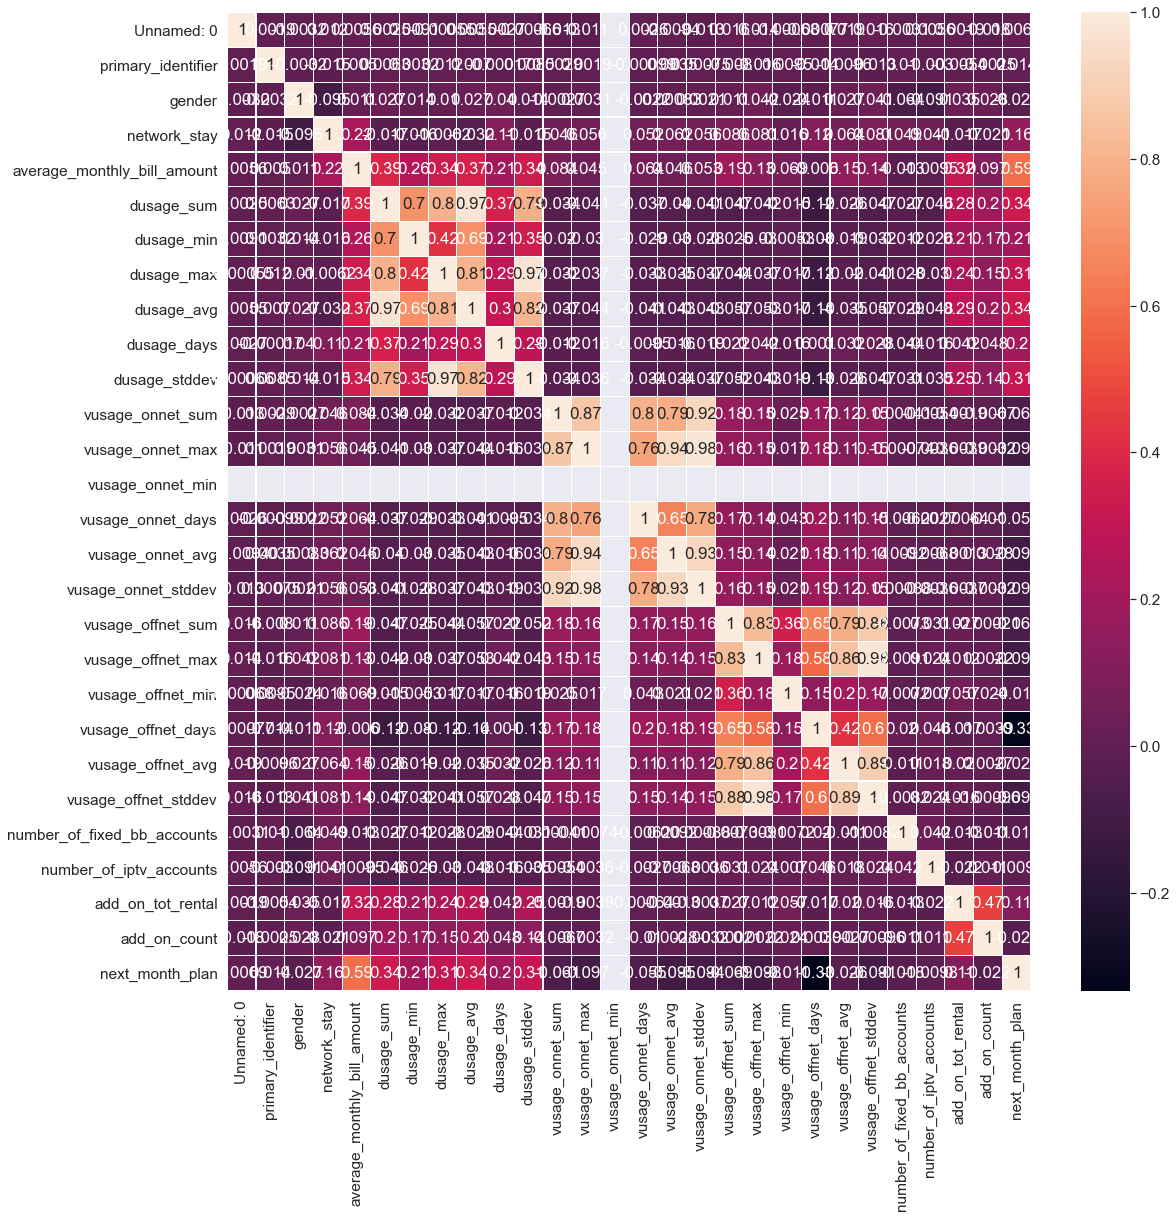

In [23]:
plt.figure(figsize=(18,18))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [86]:
df.isnull().sum()

primary_identifier             0
device_type                    0
device_category                0
gender                         0
district_name                  0
age_group                      0
network_stay                   0
average_monthly_bill_amount    0
dusage_sum                     0
dusage_min                     0
dusage_max                     0
dusage_avg                     0
dusage_days                    0
dusage_stddev                  0
vusage_onnet_sum               0
vusage_onnet_max               0
vusage_onnet_min               0
vusage_onnet_days              0
vusage_onnet_avg               0
vusage_onnet_stddev            0
vusage_offnet_sum              0
vusage_offnet_max              0
vusage_offnet_min              0
vusage_offnet_days             0
vusage_offnet_avg              0
vusage_offnet_stddev           0
number_of_fixed_bb_accounts    0
number_of_iptv_accounts        0
add_on_tot_rental              0
add_on_count                   0
next_month

In [87]:
df.shape

(10500, 31)

In [88]:
df.to_csv('null_removed.csv')

In [89]:
data_null = pd.read_csv('null_removed.csv')

In [91]:
data_null.isnull().sum().sum()

0